# AIML Assignment 4
###  Gaofeng Shi

## Part 1

In [1]:
# import the libiary
import numpy as np
import matplotlib.pyplot as plt
import torch
import pandas as pd
import random
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
bltin_sum = sum
from numpy import *
import time
import warnings
warnings.filterwarnings('ignore')

## 2.2 Part 1: Performance Metrics in Regression 

In [2]:
# load the data
diamonds_data = pd.read_csv('diamonds.csv') # diamonds.csv 
diamonds_data.drop('Unnamed: 0', inplace=True, axis=1)
diamonds_data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [3]:
# encoding the nominal features to numerical 
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
#Ordinal Encoding
diamonds_data.cut = encoder.fit_transform(diamonds_data.cut.values.reshape(-1, 1))
diamonds_data.color = encoder.fit_transform(diamonds_data.color.values.reshape(-1, 1))
diamonds_data.clarity = encoder.fit_transform(diamonds_data.clarity.values.reshape(-1, 1))
#diamonds_data.to_csv('diamonds_data.csv',index=False)
print("The number of missing values in the data before imputation :\n", diamonds_data.isnull().sum())
diamonds_data.head()

The number of missing values in the data before imputation :
 carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64


,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,2.0,1.0,3.0,61.5,55.0,3.95,3.98,2.43,326
1,0.21,3.0,1.0,2.0,59.8,61.0,3.89,3.84,2.31,326
2,0.23,1.0,1.0,4.0,56.9,65.0,4.05,4.07,2.31,327
3,0.29,3.0,5.0,5.0,62.4,58.0,4.20,4.23,2.63,334
4,0.31,1.0,6.0,3.0,63.3,58.0,4.34,4.35,2.75,335


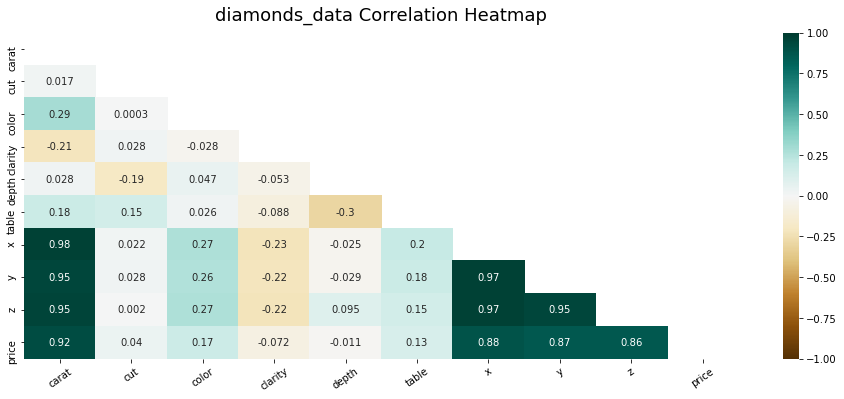

In [4]:
# generate the data correlation heatmap for 2018 data
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(diamonds_data.corr(), dtype=np.bool))
heatmap = sns.heatmap(diamonds_data.corr(),mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG',xticklabels=True)
heatmap.set_title('diamonds_data Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=35) 
plt.savefig('diamonds_data.png', dpi=300, bbox_inches='tight')

In [5]:
def data_process(dataset):
    X = dataset.iloc[:, 0:(len(dataset.columns)-1)]
    X = pd.DataFrame(StandardScaler().fit_transform(X))
    y = dataset.iloc[:, -1]
    data=(X,y)
    return data

In [6]:
# the 10 algorithms regression.
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.neural_network import MLPRegressor
MSE,RMSE,RSE,MAE, TIME = np.zeros(10),np.zeros(10),np.zeros(10),np.zeros(10),np.zeros(10)
train_X, train_y = data_process(diamonds_data)
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y,test_size=0.30, random_state=309)

y_test = np.asarray(y_test)

In [7]:
train_X.head()

,0,1,2,3,4,5,6,7,8
0,-1.198168,-0.538099,-0.937163,-0.484264,-0.174092,-1.099672,-1.587837,-1.536196,-1.571129
1,-1.240361,0.434949,-0.937163,-1.064117,-1.360738,1.585529,-1.641325,-1.658774,-1.741175
2,-1.198168,-1.511147,-0.937163,0.095589,-3.385019,3.375663,-1.498691,-1.457395,-1.741175
3,-1.071587,0.434949,1.414272,0.675442,0.454133,0.242928,-1.364971,-1.317305,-1.287720
4,-1.029394,-1.511147,2.002131,-0.484264,1.082358,0.242928,-1.240167,-1.212238,-1.117674


In [8]:
# Ten different regresstions: 
regressions = [LinearRegression(),
               KNeighborsRegressor(n_neighbors=3),
               Ridge(alpha=1.0),
               DecisionTreeRegressor(random_state=0),
               RandomForestRegressor(max_depth=5, random_state=0),
               GradientBoostingRegressor(learning_rate=0.1, random_state=0),
               SGDRegressor(max_iter=1000, tol=1e-3),
               SVR(C=1.0, epsilon=0.2),
               LinearSVR(random_state=0, tol=1e-5),
               MLPRegressor(random_state=1, max_iter=1000)]
i = 0
for regre in regressions:
    start = time.time()
    Reg = regre.fit(X_train, y_train)
    y_pred = Reg.predict(X_test)
    MSE[i] = mean_squared_error(y_test, y_pred)
    RMSE[i] = sqrt(MSE[i])
    RSE[i] = sum((y_test[j] - y_pred[j])**2 for j in range(len(y_pred))
      )/ sum((mean(y_test)- y_pred[j])**2 for j in range(len(y_pred)))
    MAE[i] = mean_absolute_error(y_test, y_pred)
    end = time.time()
    TIME[i] = end - start
    i += 1

MSE = np.around(MSE,  decimals=2, out=None)
RMSE = np.around(RMSE,  decimals=2, out=None)
RSE = np.around(RSE,  decimals=2, out=None)
MAE = np.around(MAE,  decimals=2, out=None)
TIME = np.around(TIME,  decimals=2, out=None)
d = {'Regression': ['Linear:', 'KNeighbors:', 'Ridge:', 'DecisionTree:', 'RandomForest:', 'GradientBoosting:',
                    'SGD:','SVR:','LinearSVR:','MLP:'],'MSE': MSE, 'RMSE': RMSE, 'RSE': RSE, 'MAE': MAE, 'TIME': TIME}
results = pd.DataFrame(d) #.set_index('Regression')

In [9]:
# Show the results of regression. 
results

,Regression,MSE,RMSE,RSE,MAE,TIME
0,Linear:,1896505.75,1377.14,0.13,858.61,0.67
1,KNeighbors:,730506.70,854.70,0.05,421.53,1.27
2,Ridge:,1896495.36,1377.13,0.13,858.72,0.58
3,DecisionTree:,550780.05,742.15,0.03,362.53,0.77
4,RandomForest:,1096671.86,1047.22,0.07,567.05,5.59
5,GradientBoosting:,477316.55,690.88,0.03,374.91,4.19
6,SGD:,1902923.06,1379.46,0.13,852.19,0.63
7,SVR:,8389998.80,2896.55,2.01,1417.17,74.15
8,LinearSVR:,2915543.96,1707.50,0.31,921.64,0.59
9,MLP:,930582.78,964.67,0.06,493.61,139.35


In [11]:
# output file sampleoutput.txt
import sys
f = open("sampleoutput.txt", 'w')
original_stdout = sys.stdout
sys.stdout = f
print("The result: ")
print(results)